<a href="https://colab.research.google.com/github/IbtissamRhayou/PREPROCESSING-THE-EGYPTIAN-ARABIC-DIALECT-FOR-PERSONALITY-TRAITS-PREDICTION/blob/main/PersonalityTR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [6]:
%cd gdrive/MyDrive/NLP_personalityTraits

/content/gdrive/MyDrive/NLP_personalityTraits


In [7]:
ls

arabert/                 df_multi.csv         TestSampling_Binary_Task.csv
archive/                 emojis.csv           TestSampling_Multi_Task.csv
binary_df.csv            multi_df.csv         TF-IDF.ipynb
DataPreprocessing.ipynb  PersonalityTR.ipynb  TrainSampling_Binary_Task.csv
datapreprocessing.py     result.txt           TrainSampling_Multi_Task.csv
df_binary.csv            StopWordsList.txt


In [8]:
import requests
from io import BytesIO
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
from collections import defaultdict
from pathlib import Path
import pandas as df
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import os

#Data Preprocessing:

In [9]:
directory = 'archive'
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        filen = os.path.join(directory, filename)

In [10]:
from collections import defaultdict
from pathlib import Path

#loading test and train data of multiclass representation
train_multi = pd.read_csv('TrainSampling_Multi_Task.csv',low_memory=True)
test_multi = pd.read_csv('TestSampling_Multi_Task.csv',low_memory=True)

#combining test and train data
output=train_multi.append(test_multi)
output.to_csv("multi_df.csv", sep=',')
df1 = pd.read_csv("multi_df.csv")
#loading a multiple .txt files in to python as dataframe
my_dir_path = "archive/"

Tweets = defaultdict(list)
for file in Path(my_dir_path).iterdir():#Iterate over the files in this directory.
    with open(file, "r") as file_open:
        Tweets["file_name"].append(file.name)
        Tweets["tweets"].append(file_open.read())
df = pd.DataFrame(Tweets)

#df = df.reset_index()
#df.columns[0] = 'ID'
#df['ID'] = df.index 

df.insert(0, 'ID', range(0, 0 + len(df)))


df_multi = pd.merge(df.reset_index(), df1.reset_index(), how='inner', on=['ID'],)
df_multi.drop(['index_x','index_y','file_name','Unnamed: 0'], axis = 1 , inplace=True)
df_multi.to_csv(r"df_multi.csv", index = False)

In [11]:
df_multi.head()

ID                                             tweets  NumOfTweets  ...  E  A  N
0   0  يأتي الحلال والحرام في وقت واحد فلتختار بتأن ح...         2743  ...  2  3  4
1   1  #المنيا\nعجيب اننى لم اؤذيك بكفرى\n بينما انت ...          461  ...  2  3  4
2   2  هو احنا مش هنتجوز بقى حسن عزام عنده شبشب في ال...            5  ...  1  3  4
3   3  شايفك يا واطي :'D\n #المباحث_بتوزع_فولورز_بالد...           52  ...  1  1  1
4   4  الطبيعي بتاع الولاد إنهم ميعملوش إحترام للبنت ...           41  ...  3  2  3

[5 rows x 19 columns]

In [12]:
#loading test and train data of binary representation
train_multi = pd.read_csv('TrainSampling_Binary_Task.csv',low_memory=True)
test_multi = pd.read_csv('TestSampling_Binary_Task.csv',low_memory=True)

#combining test and train data
output=train_multi.append(test_multi)
output.to_csv("binary_df.csv", sep=',')
df2 = pd.read_csv("binary_df.csv")
#loading a multiple .txt files in to python as dataframe
my_dir_path = "archive/"

Tweets = defaultdict(list)
for file in Path(my_dir_path).iterdir():#Iterate over the files in this directory.
    with open(file, "r") as file_open:
        Tweets["file_name"].append(file.name)
        Tweets["tweets"].append(file_open.read())
df = pd.DataFrame(Tweets)

#df = df.reset_index()
#df.columns[0] = 'ID'
#df['ID'] = df.index 

df.insert(0, 'ID', range(0, 0 + len(df)))


df_binary = pd.merge(df.reset_index(), df2.reset_index(), how='inner', on=['ID'])
df_binary.drop(['index_x','index_y','file_name','Unnamed: 0'], axis = 1 , inplace=True)
df_binary.to_csv(r"df_binary.csv", index = False)

In [13]:
df_binary.head()

ID                                             tweets  NumOfTweets  ...  E  A  N
0   0  يأتي الحلال والحرام في وقت واحد فلتختار بتأن ح...         2743  ...  0  1  1
1   1  #المنيا\nعجيب اننى لم اؤذيك بكفرى\n بينما انت ...          461  ...  0  1  1
2   2  هو احنا مش هنتجوز بقى حسن عزام عنده شبشب في ال...            5  ...  0  0  1
3   3  شايفك يا واطي :'D\n #المباحث_بتوزع_فولورز_بالد...           52  ...  0  0  0
4   4  الطبيعي بتاع الولاد إنهم ميعملوش إحترام للبنت ...           41  ...  0  0  1

[5 rows x 19 columns]

In [14]:
from itertools import chain

tweets = df_multi['tweets'].str.split('\n')
df_multi = pd.DataFrame({
    'ID' : df_multi['ID'].values.repeat(tweets.str.len()),
    'tweets' : list(chain.from_iterable(tweets.tolist())),
    'NumOfTweets' : df_multi['NumOfTweets'].values.repeat(tweets.str.len()),
    'NumOfFollowers' : df_multi['NumOfFollowers'].values.repeat(tweets.str.len()),
    'NumOfFollowing' : df_multi['NumOfFollowing'].values.repeat(tweets.str.len()),
    'NumOfFavourites' : df_multi['NumOfFavourites'].values.repeat(tweets.str.len()),
    'NumOfTweetsPerDay' : df_multi['NumOfTweetsPerDay'].values.repeat(tweets.str.len()),
    'RetweetCount' : df_multi['RetweetCount'].values.repeat(tweets.str.len()),
    'ReplyCount' : df_multi['ReplyCount'].values.repeat(tweets.str.len()),
    'O_Sc' : df_multi['O_Sc'].values.repeat(tweets.str.len()),
    'C_Sc' : df_multi['C_Sc'].values.repeat(tweets.str.len()),
    'E_Sc' : df_multi['E_Sc'].values.repeat(tweets.str.len()),
    'A_Sc' : df_multi['A_Sc'].values.repeat(tweets.str.len()),
    'N_Sc' : df_multi['N_Sc'].values.repeat(tweets.str.len()),
    'O' : df_multi['O'].values.repeat(tweets.str.len()),
    'C' : df_multi['C'].values.repeat(tweets.str.len()),
    'E' : df_multi['E'].values.repeat(tweets.str.len()),
    'A' : df_multi['A'].values.repeat(tweets.str.len()),
    'N' : df_multi['N'].values.repeat(tweets.str.len())
    
})

In [15]:
df_multi

ID                                             tweets  ...  A  N
0       0  يأتي الحلال والحرام في وقت واحد فلتختار بتأن ح...  ...  3  4
1       0                    لا اله الا الله محمد رسول الله   ...  3  4
2       0                           :) أحضنها حتى بروح خيالك  ...  3  4
3       0                  احضنها بين خوفك عليها و بين سؤالك  ...  3  4
4       0                    احضنها كل ما تلمحك في عينيك وجع  ...  3  4
...    ..                                                ...  ... .. ..
14647  91  آخر كلمات كافكا للطبيب. الله بحب الانترنت والل...  ...  3  2
14648  91  ان الحيوانات مش هتعيش حياه تانيه بعد الحياه دي...  ...  3  2
14649  91  شكرا روح لامك https://t.co/9fyLpOtcsS ايه ده ا...  ...  3  2
14650  91                  اغبي تويته شفتها هنا من فتره انا   ...  3  2
14651  91  اللي هو انا الحياه كانت كريمه ولطيفه معايا ومت...  ...  3  2

[14652 rows x 19 columns]

In [16]:
dfI = df_multi[['ID']]
dft = df_multi[['tweets']]
dfy = df_multi[['O','C','E','A','N']]

In [17]:
y = []
for _, row in dfy.iterrows() :
    result = np.where(row.values == np.amax(row.values))
    y.append(result[0][0])

from pandas import DataFrame
dfy = DataFrame(y,columns=['label'])
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([dfI,dft,dfy], axis=1)
df

ID                                             tweets  label
0       0  يأتي الحلال والحرام في وقت واحد فلتختار بتأن ح...      0
1       0                    لا اله الا الله محمد رسول الله       0
2       0                           :) أحضنها حتى بروح خيالك      0
3       0                  احضنها بين خوفك عليها و بين سؤالك      0
4       0                    احضنها كل ما تلمحك في عينيك وجع      0
...    ..                                                ...    ...
14647  91  آخر كلمات كافكا للطبيب. الله بحب الانترنت والل...      0
14648  91  ان الحيوانات مش هتعيش حياه تانيه بعد الحياه دي...      0
14649  91  شكرا روح لامك https://t.co/9fyLpOtcsS ايه ده ا...      0
14650  91                  اغبي تويته شفتها هنا من فتره انا       0
14651  91  اللي هو انا الحياه كانت كريمه ولطيفه معايا ومت...      0

[14652 rows x 3 columns]

#1/Text Cleaning: 
- deal with emojies,tags,@,links(URL)
-Normalization: Normalise Hamza ,Normalise Lam Alef, Normalise hah(ه), Normalise yah(ي), Strip Tashkeel & Strip Tatweel.
-Redundancy removal
-Stemming:
-Lemmatization
-Stop words


In [18]:
!pip install emoji --upgrade

Requirement already up-to-date: emoji in /usr/local/lib/python3.7/dist-packages (1.2.0)


In [19]:
!pip install Unidecode --upgrade

Requirement already up-to-date: Unidecode in /usr/local/lib/python3.7/dist-packages (1.2.0)


In [20]:
!pip install aiogoogletrans --upgrade 

Requirement already up-to-date: aiogoogletrans in /usr/local/lib/python3.7/dist-packages (3.3.2)


In [21]:
import re
import string
import numpy as np
import pandas as pd
import nltk

import spacy
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.utils import shuffle

from emoji import UNICODE_EMOJI
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords



######################"1/Data Cleaning: deal with emojies,tags,@,links,######################


##count the avg words in a sentence:

def avg_word(sentence):
    words = sentence.split()
    if len(words) == 0:
        return 0
    return (sum(len(word) for word in words)/len(words))

##Deal with Hashtags in a string

def is_hashtag(word):
    if word.startswith("#"):
        return True
    else:
        return False
def split_hashtag_to_words(tag):
    tag = tag.replace('#','')
    tags = tag.split('_')
    if len(tags) > 1 :
        return tags
    pattern = re.compile(r"[A-Z][a-z]+|\d+|[A-Z]+(?![a-z])")
    return pattern.findall(tag)

def clean_hashtag(text):
    words = text.split()
    text = list()
    for word in words:
        if is_hashtag(word):
            text.extend(extract_hashtag(word))
        else:
            text.append(word)
    return " ".join(text)

def extract_hashtag(text):
    
    hash_list = ([re.sub(r"(\W+)$", "", i) for i in text.split() if i.startswith("#")])
    word_list = []
    for word in hash_list :
        word_list.extend(split_hashtag_to_words(word))
    return word_list


## count emojies

def emoji_counter(sentence):
    return emoji.emoji_count(sentence)

##encoding emojis to text(emojis into a string):

with open('emojis.csv','r',encoding='utf-8') as f:
     lines = f.readlines()
     emojis_ar = {}
     for line in lines:
        line = line.strip('\n').split(';')
        emojis_ar.update({line[0].strip():line[1].strip()})


from __future__ import unicode_literals

def remove_emoji(text):
    emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text

import unicodedata
from unidecode import unidecode

def emoji_native_translation(text):
    #text = text.lower()
    loves = ["<3", "♥",'❤']
    smilefaces = []
    sadfaces = []
    neutralfaces = []

    eyes = ["8",":","=",";"]
    nose = ["'","`","-",r"\\"]
    for e in eyes:
        for n in nose:
            for s in ["\)", "d", "]", "}","p"]:
                smilefaces.append(e+n+s)
                smilefaces.append(e+s)
            for s in ["\(", "\[", "{"]:
                sadfaces.append(e+n+s)
                sadfaces.append(e+s)
            for s in ["\|", "\/", r"\\"]:
                neutralfaces.append(e+n+s)
                neutralfaces.append(e+s)
            #reversed
            for s in ["\(", "\[", "{"]:
                smilefaces.append(s+n+e)
                smilefaces.append(s+e)
            for s in ["\)", "\]", "}"]:
                sadfaces.append(s+n+e)
                sadfaces.append(s+e)
            for s in ["\|", "\/", r"\\"]:
                neutralfaces.append(s+n+e)
                neutralfaces.append(s+e)

    smilefaces = list(set(smilefaces))
    sadfaces = list(set(sadfaces))
    neutralfaces = list(set(neutralfaces))
    t = []
    for w in text.split():
        if w in loves:
            t.append("حب")
        elif w in smilefaces:
            t.append("مضحك")
        elif w in neutralfaces:
            t.append("عادي")
        elif w in sadfaces:
            t.append("محزن")
        else:
            t.append(w)
    newText = " ".join(t)
    return newText

import emoji
def is_emoji(word):
    if word in emojis_ar:
        return True
    else:
        return False
    
def add_space(text):
    return ''.join(' ' + char if is_emoji(char) else char for char in text).strip()

from aiogoogletrans import Translator
translator = Translator()
import asyncio
loop = asyncio.get_event_loop()
def translate_emojis(words):
    word_list = list()
    words_to_translate = list()
    for word in words :
        t = emojis_ar.get(word.get('emoji'),None)
        if t is None:
            word.update({'translation':'عادي','translated':True})
            #words_to_translate.append('normal')
        else:
            word.update({'translated':False,'translation':t})
            words_to_translate.append(t.replace(':','').replace('_',' '))
        word_list.append(word)
    return word_list

def emoji_unicode_translation(text):
    text = add_space(text)
    words = text.split()
    text_list = list()
    emojis_list = list()
    c = 0
    for word in words:
        if is_emoji(word):
            emojis_list.append({'emoji':word,'emplacement':c})
        else:
            text_list.append(word)
        c+=1
    emojis_translated = translate_emojis(emojis_list)
    for em in emojis_translated:
        text_list.insert(em.get('emplacement'),em.get('translation'))
    text = " ".join(text_list)
    return text
    
def clean_emoji(text):
    text = emoji_native_translation(text)
    text = emoji_unicode_translation(text)
    return text


def clean_tweet(text):
    text = re.sub('#\d+K\d+', ' ', text)  # years like 2K19
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT(Request Tracker) and cc
    text = re.sub('@[^\s]+',' ',text)
    text = re.sub(r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)", "",  text, flags=re.MULTILINE)
    text = clean_hashtag(text)
    text = clean_emoji(text)
    return text

Normalization

In [22]:
COMMA            = u'\u060C'
SEMICOLON        = u'\u061B'
QUESTION         = u'\u061F'
HAMZA            = u'\u0621'
ALEF_MADDA       = u'\u0622'
ALEF_HAMZA_ABOVE = u'\u0623'
WAW_HAMZA        = u'\u0624'
ALEF_HAMZA_BELOW = u'\u0625'
YEH_HAMZA        = u'\u0626'
ALEF             = u'\u0627'
BEH              = u'\u0628'
TEH_MARBUTA      = u'\u0629'
TEH              = u'\u062a'
THEH             = u'\u062b'
JEEM             = u'\u062c'
HAH              = u'\u062d'
KHAH             = u'\u062e'
DAL              = u'\u062f'
THAL             = u'\u0630'
REH              = u'\u0631'
ZAIN             = u'\u0632'
SEEN             = u'\u0633'
SHEEN            = u'\u0634'
SAD              = u'\u0635'
DAD              = u'\u0636'
TAH              = u'\u0637'
ZAH              = u'\u0638'
AIN              = u'\u0639'
GHAIN            = u'\u063a'
TATWEEL          = u'\u0640'
FEH              = u'\u0641'
QAF              = u'\u0642'
KAF              = u'\u0643'
LAM              = u'\u0644'
MEEM             = u'\u0645'
NOON             = u'\u0646'
HEH              = u'\u0647'
WAW              = u'\u0648'
ALEF_MAKSURA     = u'\u0649'
YEH              = u'\u064a'
MADDA_ABOVE      = u'\u0653'
HAMZA_ABOVE      = u'\u0654'
HAMZA_BELOW      = u'\u0655'
ZERO             = u'\u0660'
ONE              = u'\u0661'
TWO              = u'\u0662'
THREE            = u'\u0663'
FOUR             = u'\u0664'
FIVE             = u'\u0665'
SIX              = u'\u0666'
SEVEN            = u'\u0667'
EIGHT            = u'\u0668'
NINE             = u'\u0669'
PERCENT          = u'\u066a'
DECIMAL          = u'\u066b'
THOUSANDS        = u'\u066c'
STAR             = u'\u066d'
MINI_ALEF        = u'\u0670'
ALEF_WASLA       = u'\u0671'
FULL_STOP        = u'\u06d4'
BYTE_ORDER_MARK  = u'\ufeff'

# Diacritics
FATHATAN         = u'\u064b'
DAMMATAN         = u'\u064c'
KASRATAN         = u'\u064d'
FATHA            = u'\u064e'
DAMMA            = u'\u064f'
KASRA            = u'\u0650'
SHADDA           = u'\u0651'
SUKUN            = u'\u0652'

#Ligatures
LAM_ALEF=u'\ufefb'
LAM_ALEF_HAMZA_ABOVE=u'\ufef7'
LAM_ALEF_HAMZA_BELOW=u'\ufef9'
LAM_ALEF_MADDA_ABOVE=u'\ufef5'
simple_LAM_ALEF=u'\u0644\u0627'
simple_LAM_ALEF_HAMZA_ABOVE=u'\u0644\u0623'
simple_LAM_ALEF_HAMZA_BELOW=u'\u0644\u0625'
simple_LAM_ALEF_MADDA_ABOVE=u'\u0644\u0622'

HARAKAT_pat =re.compile(r"["+u"".join([FATHATAN,DAMMATAN,KASRATAN,FATHA,DAMMA,KASRA,SUKUN,SHADDA])+u"]")
HAMZAT_pat =re.compile(r"["+u"".join([WAW_HAMZA,YEH_HAMZA])+u"]");
ALEFAT_pat =re.compile(r"["+u"".join([ALEF_MADDA,ALEF_HAMZA_ABOVE,ALEF_HAMZA_BELOW,HAMZA_ABOVE,HAMZA_BELOW])+u"]");
LAMALEFAT_pat =re.compile(r"["+u"".join([LAM_ALEF,LAM_ALEF_HAMZA_ABOVE,LAM_ALEF_HAMZA_BELOW,LAM_ALEF_MADDA_ABOVE])+u"]");



def normalize_hamza(text):
	"""Normalize Hamza forms into one form, and return a result text.
	The converted letters are : 
		- The converted lettersinto HAMZA are: WAW_HAMZA,YEH_HAMZA 
		- The converted lettersinto ALEF are: ALEF_MADDA, ALEF_HAMZA_ABOVE, ALEF_HAMZA_BELOW ,HAMZA_ABOVE, HAMZA_BELOW 
	Example:
		>>> text=u"أهؤلاء من أولئكُ"
		>>> normalize_hamza(text)
		اهءلاء من اولءكُ
	@param text: arabic text.
	@type text: unicode.
	@return: return a converted text.
	@rtype: unicode.
    """
	text=ALEFAT_pat.sub(ALEF, text)
	return HAMZAT_pat.sub(HAMZA, text)



def normalize_lamalef(text):
	"""Normalize Lam Alef ligatures into two letters (LAM and ALEF), and Tand return a result text.
	Some systems present lamAlef ligature as a single letter, this function convert it into two letters,
	The converted letters into  LAM and ALEF are : 
		- LAM_ALEF, LAM_ALEF_HAMZA_ABOVE, LAM_ALEF_HAMZA_BELOW, LAM_ALEF_MADDA_ABOVE
	Example:
		>>> text=u"لانها لالء الاسلام"
		>>> normalize_lamalef(text)
		لانها لالئ الاسلام
	@param text: arabic text.
	@type text: unicode.
	@return: return a converted text.
	@rtype: unicode.
	"""
	return LAMALEFAT_pat.sub(u'%s%s'%(LAM,ALEF), text)
 
#Strip Elongation
def strip_tatweel(text):
	"""
	Strip tatweel from a text and return a result text.
	Example:
		>>> text=u"العـــــربية"
		>>> strip_tatweel(text)
		العربية
	@param text: arabic text.
	@type text: unicode.
	@return: return a striped text.
	@rtype: unicode.
	"""
	return re.sub(r'[%s]' % TATWEEL,	'', text)

#Strip Diacritics 
def strip_tashkeel(text):
	"""Strip vowel from a text and return a result text.
	The striped marks are : 
		- FATHA, DAMMA, KASRA
		- SUKUN
		- SHADDA
		- FATHATAN, DAMMATAN, KASRATAN, , , .
	Example:
		>>> text=u"الْعَرَبِيّةُ"
		>>> strip_tashkeel(text)
		العربية
	@param text: arabic text.
	@type text: unicode.
	@return: return a striped text.
	@rtype: unicode.
    """
	return HARAKAT_pat.sub('', text)


#Normalize Yeh / Normalize Heh
def normalize_spellerrors(text):
	"""Normalize some spellerrors like, TEH_MARBUTA into HEH,ALEF_MAKSURA into YEH, and Tand return a result text.
	In some context users omit the difference between TEH_MARBUTA and HEH, and ALEF_MAKSURA and YEh.
	The conversions are:
		- TEH_MARBUTA into HEH
		- ALEF_MAKSURA into YEH
	Example:
		>>> text=u"اشترت سلمى دمية وحلوى"
		>>> normalize_spellerrors(text)
		اشترت سلمي دميه وحلوي
	@param text: arabic text.
	@type text: unicode.
	@return: return a converted text.
	@rtype: unicode. 
	"""
	text=re.sub(r'[%s]' % TEH_MARBUTA,	HEH, text)
	return re.sub(r'[%s]' % ALEF_MAKSURA,	YEH, text)


def normalize_searchtext(text):
	"""Normalize input text and return a result text.
	Normalize a text by :
		- strip tashkeel
		- strip tatweel
		- normalize  Hamza
		- normalize Lam Alef.
		- normalize Teh Marbuta and Alef Maksura
	Example:
		>>> text=u'أستشتري دمـــى آلية لأبنائك قبل الإغلاق'
		>>> normalize_searchtext(text)
		استشتري دمي اليه لابناءك قبل الاغلاق
	@param text: arabic text.
	@type text: unicode.
	@return: return a normalized text.
	@rtype: unicode. 
	"""
	text=strip_tashkeel(text);
	text=strip_tatweel(text);
	text=normalize_lamalef(text);
	text=normalize_hamza(text);
	text=normalize_spellerrors(text);
	return text;

redundancy removal

In [23]:
#اهالاااا----->اهال
# encoding: utf-8
from __future__ import unicode_literals
import re

def redundancy_removal(text):
  
    p_longation = re.compile(r'(.)\1+')
    subst = r"\1\1"
    text = re.sub(p_longation, subst, text)

    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('اا', 'ا')
    return text

Stemming:
ransliterate text which write a word using the closest corresponding letters of a different alphabet or language. The algorithm gives the possible words in Arabic based on a given word in Latin by mapping Latin letters to Arabic ones, then takes the most frequent word existing in a corpus.

In [24]:
!pip install tashaphyne --upgrade

Requirement already up-to-date: tashaphyne in /usr/local/lib/python3.7/dist-packages (0.3.4.1)


In [25]:
#from dsaraby import DSAraby
#ds = DSAraby()

from tashaphyne.stemming import ArabicLightStemmer
from nltk.stem.isri import ISRIStemmer

ArListem = ArabicLightStemmer()

#def to_arabic(text):
#    return ds.transliterate(text)
    
def stem(text):
    zen = TextBlob(text)
    words = zen.words
    cleaned = list()
    for w in words:
        ArListem.light_stem(w)
        cleaned.append(ArListem.get_root())
    return " ".join(cleaned)


Lemmatization

In [26]:
from nltk.stem.isri import ISRIStemmer
def lem(text):
  print(ISRIStemmer().suf32(text))
  return text

Stop words

In [27]:
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob

ar_stopwords_file = open('StopWordsList.txt', 'r', encoding='utf-8') 
ar_stopword = ar_stopwords_file.read().splitlines()

def remove_stop_words(text,ar_stopwords):
    text_tokens = word_tokenize(text)
    return " ".join([word for word in text_tokens if not word in ar_stopwords])



In [28]:
!pip install PyArabic

In [29]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
import pyarabic.araby as araby
arbic_stopwords = set(nltk.corpus.stopwords.words("arabic"))
arabic_diacritics = re.compile("""
                             ّ    | # Tashdid/shada
                             َ    | # Fatha
                             ً    | # Tanwin Fath/ fathatayn
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm/ dammatayn
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr/ kasratayn
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations


Cleaned DATA:

In [31]:
def clean_text(text):
    ## Clean for tweets
    text = clean_tweet(text)
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text) 
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    ## Remove Emojis
    text = remove_emoji(text)
    ## Convert text to lowercases
    text = text.lower()
    ## Arabisy the text
    #text = to_arabic(text)
    ## Remove stop words
    text = remove_stop_words(text,ar_stopword)
    ## Remove numbers
    text = re.sub("\d+", " ", text)
    ## Remove Tashkeel
    text = normalize_searchtext(text)
    #text = re.sub('\W+', ' ', text)
    text = re.sub('[A-Za-z]+',' ',text)
    text = re.sub(r'\\u[A-Za-z0-9\\]+',' ',text)
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    ##remove redundancy
    text = redundancy_removal(text)
    #Stemming
    #text = stem(text)
    #Lemmatisazion
    text = lem(text)
    return text

In [32]:
for i in range(len(df_multi.tweets)):
  df_multi.tweets[i] = clean_text(df_multi.tweets[i])

ياتي الحلال والحرام وقت فلتختار بتان تندم استرخاء لله وانا راحعون جدد ايمانك
اله الله محمد رسول الله
احضنها بروح خيالك
احضنها خوفك سءالك
احضنها تلمحك عينيك وجع
احمد الراوي انا زي المترو بشيل
جوايا ورايح جي
انا ميت
بره ببانلك حي
ف تشوفني بوش مداري
الاحزان هسمي ولادي وانتي
اسم ابتسامتك دي
واربي
خفه جمال روحك
واحفظهم اصول سيرتك
عايزك
تبصي حكمه
احلي النجاح صعب لانه يثبت قدرتكم التحدي والنجاح
مباركه يالله
اعرف المسجد الاقصي يا مسلمين عيب نبقي مش عارفين شكله حال بلدي
ولاد وبن
كلو عايز يقصر ويضيق الهدوم
مستني ايه بلد ده حال شباب
بقوا يبصوا الصور القديمه
عباره ذكريات للحظات حلوه
لحظات ناس جبرتنا الحياه فقدان
ولحظات ناس ربنا يديم عارف تحس بالوحده
انك مش لوحدك
اله انت
سبحانك اني كنت الظالمين وانتوا طيبين يا بناويت وعيد سعيد عليكم هه الواحد بقي بينزل الجامعه بيتشاهد روحه
يبكي

ربنا يستر فرحه بيلعب بالكره معا
ضحكت شلتها دوخت
ضحكت مبسوطه اني باكله احساسك دخلت الفرحه قلب طفل اتحرم كلمه ماما وبابا
حلو بجد اتمني الضيوف اللي شرفونا يكونوا شخص قالي
الشكوه لغير الله
اتضايقت الكلمه
بس طلعت دي الحقيقه
الحم

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
حاولي تبطليهم عشان احنا داخلين ايام كلها فقر هنشحت كده فرح فرح فرح دا عادي معظم الناس كدا بيبقي ليها جو مختلف فرح
بس بيفضل اكلات معينه بتحبي تاكليها مامتك بس نري الشر نري الشر يارب اقدر اتخرج الكليه دي البس نضاره ادمن القهوه النسكافيه رفع اليدين يا بخت اللي مصدر رزقه شغله الحاجه اللي بيحبها حد شاف جدول خامسه ماشربش عندك برتقان عندنا حد زي عمر الباطنه زمانا جبنا خامسه دي شوال شفت جنتل مان شرم جاي يساعدني اشيل الشنط لسه هتشتغل دماغي اغنيه دا اللي حلمت بيه جات يا بيشوي بعيد ردت صدري قتلتني قطه هزت عرش ال دي اكيد مءامره الكليه عشان تلهينا قضيتنا الاساسيه وسيله لفك التجمعات يد جري انا نفسي تحبيني يا فريده مش هنسلم مش هنبيع مش هنوافق التقديم جري جري يعني انا المفروض اقعد اذاكر لامتحان بكره احضر الشنط للسفر اقابل الناس اللي بتبارك لغدير اقعد غدير نفسها نفكر التنسيق ال نكد دا رقبه مين يا مصر نصيحه لخامسه جديد ماتسمعش كلام خامسه قديم
اه بالظبط يعني تنفض لكلامي دا عشان انا للاسف خامسه قديم اللا نهاءيه بعدها يد انا بحب 

In [33]:
df_multi

ID                                             tweets  ...  A  N
0       0  ياتي الحلال والحرام وقت فلتختار بتان تندم استر...  ...  3  4
1       0                            اله الله محمد رسول الله  ...  3  4
2       0                                  احضنها بروح خيالك  ...  3  4
3       0                                  احضنها خوفك سءالك  ...  3  4
4       0                             احضنها تلمحك عينيك وجع  ...  3  4
...    ..                                                ...  ... .. ..
14647  91  اخر كلمات كافكا للطبيب الله بحب الانترنت والله...  ...  3  2
14648  91  الحيوانات مش هتعيش حياه تانيه الحياه دي ولسبب ...  ...  3  2
14649  91  شكرا روح لامك ايه ده انتو بتنتقدوني بقي دي هاي...  ...  3  2
14650  91                          اغبي تويته شفتها فتره انا  ...  3  2
14651  91  اللي انا الحياه كريمه ولطيفه معايا ومتعرضتش لل...  ...  3  2

[14652 rows x 19 columns]

In [34]:
for i in range(len(df.tweets)):
  df.tweets[i] = clean_text(df.tweets[i])

ياتي الحلال والحرام وقت فلتختار بتان تندم استرخاء لله وانا راحعون جدد ايمانك
اله الله محمد رسول الله
احضنها بروح خيالك
احضنها خوفك سءالك
احضنها تلمحك عينيك وجع
احمد الراوي انا زي المترو بشيل
جوايا ورايح جي
انا ميت
بره ببانلك حي
ف تشوفني بوش مداري
الاحزان هسمي ولادي وانتي
اسم ابتسامتك دي
واربي
خفه جمال روحك
واحفظهم اصول سيرتك
عايزك
تبصي حكمه
احلي النجاح صعب لانه يثبت قدرتكم التحدي والنجاح
مباركه يالله
اعرف المسجد الاقصي يا مسلمين عيب نبقي مش عارفين شكله حال بلدي
ولاد وبن
كلو عايز يقصر ويضيق الهدوم
مستني ايه بلد ده حال شباب
بقوا يبصوا الصور القديمه
عباره ذكريات للحظات حلوه
لحظات ناس جبرتنا الحياه فقدان
ولحظات ناس ربنا يديم عارف تحس بالوحده
انك مش لوحدك
اله انت
سبحانك اني كنت الظالمين وانتوا طيبين يا بناويت وعيد سعيد عليكم هه الواحد بقي بينزل الجامعه بيتشاهد روحه
يبكي

ربنا يستر فرحه بيلعب بالكره معا
ضحكت شلتها دوخت
ضحكت مبسوطه اني باكله احساسك دخلت الفرحه قلب طفل اتحرم كلمه ماما وبابا
حلو بجد اتمني الضيوف اللي شرفونا يكونوا شخص قالي
الشكوه لغير الله
اتضايقت الكلمه
بس طلعت دي الحقيقه
الحم

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
حاولي تبطليهم عشان احنا داخلين ايام كلها فقر هنشحت كده فرح فرح فرح دا عادي معظم الناس كدا بيبقي ليها جو مختلف فرح
بس بيفضل اكلات معينه بتحبي تاكليها مامتك بس نري الشر نري الشر يارب اقدر اتخرج الكليه دي البس نضاره ادمن القهوه النسكافيه رفع اليدين يا بخت اللي مصدر رزقه شغله الحاجه اللي بيحبها حد شاف جدول خامسه ماشربش عندك برتقان عندنا حد زي عمر الباطنه زمانا جبنا خامسه دي شوال شفت جنتل مان شرم جاي يساعدني اشيل الشنط لسه هتشتغل دماغي اغنيه دا اللي حلمت بيه جات يا بيشوي بعيد ردت صدري قتلتني قطه هزت عرش ال دي اكيد مءامره الكليه عشان تلهينا قضيتنا الاساسيه وسيله لفك التجمعات يد جري انا نفسي تحبيني يا فريده مش هنسلم مش هنبيع مش هنوافق التقديم جري جري يعني انا المفروض اقعد اذاكر لامتحان بكره احضر الشنط للسفر اقابل الناس اللي بتبارك لغدير اقعد غدير نفسها نفكر التنسيق ال نكد دا رقبه مين يا مصر نصيحه لخامسه جديد ماتسمعش كلام خامسه قديم
اه بالظبط يعني تنفض لكلامي دا عشان انا للاسف خامسه قديم اللا نهاءيه بعدها يد انا بحب 

In [35]:
df

ID                                             tweets  label
0       0  ياتي الحلال والحرام وقت فلتختار بتان تندم استر...      0
1       0                            اله الله محمد رسول الله      0
2       0                                  احضنها بروح خيالك      0
3       0                                  احضنها خوفك سءالك      0
4       0                             احضنها تلمحك عينيك وجع      0
...    ..                                                ...    ...
14647  91  اخر كلمات كافكا للطبيب الله بحب الانترنت والله...      0
14648  91  الحيوانات مش هتعيش حياه تانيه الحياه دي ولسبب ...      0
14649  91  شكرا روح لامك ايه ده انتو بتنتقدوني بقي دي هاي...      0
14650  91                          اغبي تويته شفتها فتره انا      0
14651  91  اللي انا الحياه كريمه ولطيفه معايا ومتعرضتش لل...      0

[14652 rows x 3 columns]

#Features Extracting: numerical feature selection

In [32]:
import numpy as np 
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from pylab  import rcParams
import seaborn as sb
import scipy
from scipy.stats import  spearmanr

In [33]:
%matplotlib inline
rcParams['figure.figsize'] = ([6, 4])
sb.set_style('whitegrid')

Spearman Rank Correlation 

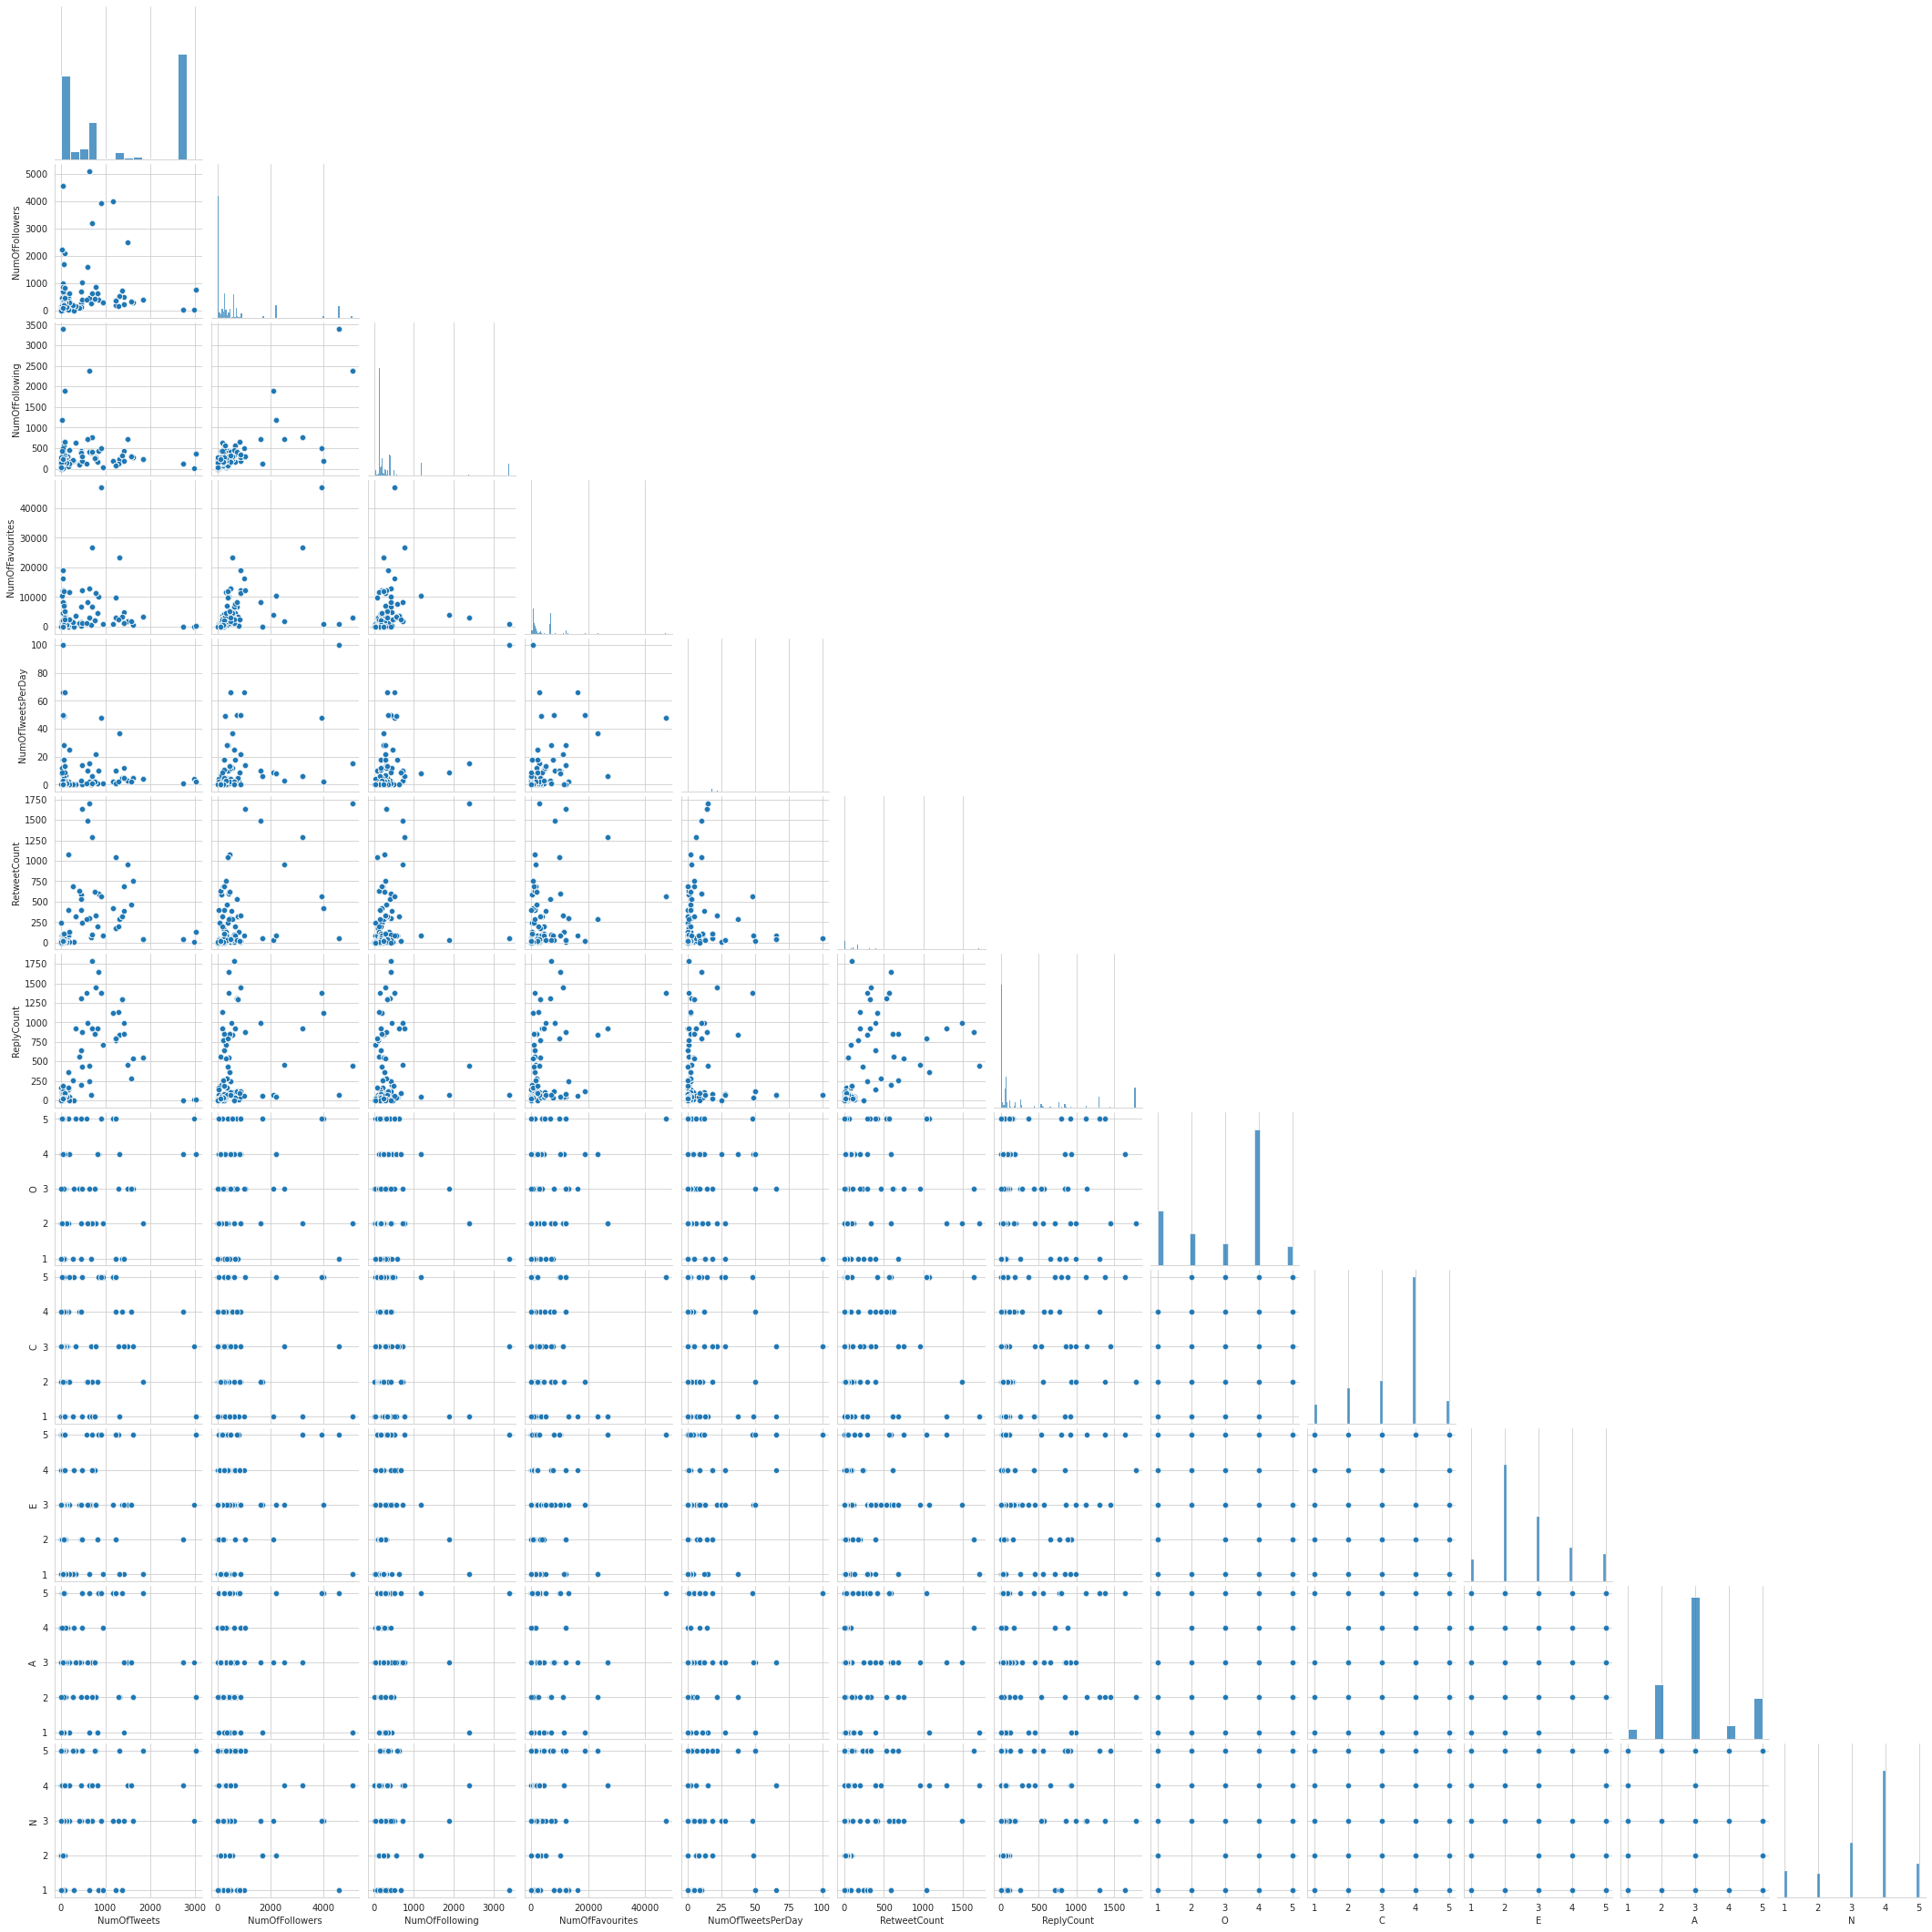

In [34]:
dfM = df_multi.filter(['NumOfTweets', 'NumOfFollowers', 'NumOfFollowing',
      'NumOfFavourites', 'NumOfTweetsPerDay', 'RetweetCount', 'ReplyCount', 'O', 'C', 'E', 'A', 'N'], axis=1)
sb.pairplot(dfM,corner=True)

In [35]:
O_p = df_multi['O_Sc']
C_p = df_multi['C_Sc']
E_p = df_multi['E_Sc']
A_p = df_multi['A_Sc']
N_p = df_multi['N_Sc']
NT_p = df_multi['NumOfTweets']
NF_p = df_multi['NumOfFollowers']
NFg_p = df_multi['NumOfFollowing']
NFv_p = df_multi['NumOfFavourites']
NTD_p = df_multi['NumOfTweetsPerDay']
NR_p = df_multi['RetweetCount']
NRp_p = df_multi['ReplyCount']

#Op
spearmanr_coef1_O, p_value = spearmanr(O_p ,NT_p)
spearmanr_coef2_O, p_value = spearmanr(O_p ,NF_p)
spearmanr_coef3_O, p_value = spearmanr(O_p ,NFg_p)
spearmanr_coef4_O, p_value = spearmanr(O_p ,NFv_p)
spearmanr_coef5_O, p_value = spearmanr(O_p ,NTD_p)
spearmanr_coef6_O, p_value = spearmanr(O_p ,NR_p)
spearmanr_coef7_O, p_value = spearmanr(O_p ,NRp_p)
print('Spearman Rank Correlation Coef %0.3f',(spearmanr_coef1_O,spearmanr_coef2_O,spearmanr_coef3_O,spearmanr_coef4_O,spearmanr_coef5_O,spearmanr_coef6_O,spearmanr_coef7_O))

#Co
spearmanr_coef1_C, p_value = spearmanr(C_p ,NT_p)
spearmanr_coef2_C, p_value = spearmanr(C_p ,NF_p)
spearmanr_coef3_C, p_value = spearmanr(C_p ,NFg_p)
spearmanr_coef4_C, p_value = spearmanr(C_p ,NFv_p)
spearmanr_coef5_C, p_value = spearmanr(C_p ,NTD_p)
spearmanr_coef6_C, p_value = spearmanr(C_p ,NR_p)
spearmanr_coef7_C, p_value = spearmanr(C_p ,NRp_p)
print('Spearman Rank Correlation Coef %0.3f',(spearmanr_coef1_C,spearmanr_coef2_C,spearmanr_coef3_C,spearmanr_coef4_C,spearmanr_coef5_C,spearmanr_coef6_C,spearmanr_coef7_C))

#E
spearmanr_coef1_E, p_value = spearmanr(E_p ,NT_p)
spearmanr_coef2_E, p_value = spearmanr(E_p ,NF_p)
spearmanr_coef3_E, p_value = spearmanr(E_p ,NFg_p)
spearmanr_coef4_E, p_value = spearmanr(E_p ,NFv_p)
spearmanr_coef5_E, p_value = spearmanr(E_p ,NTD_p)
spearmanr_coef6_E, p_value = spearmanr(E_p ,NR_p)
spearmanr_coef7_E, p_value = spearmanr(E_p ,NRp_p)
print('Spearman Rank Correlation Coef %0.3f',(spearmanr_coef1_E,spearmanr_coef2_E,spearmanr_coef3_E,spearmanr_coef4_E,spearmanr_coef5_E,spearmanr_coef6_E,spearmanr_coef7_E))

#A
spearmanr_coef1_A, p_value = spearmanr(A_p ,NT_p)
spearmanr_coef2_A, p_value = spearmanr(A_p ,NF_p)
spearmanr_coef3_A, p_value = spearmanr(A_p ,NFg_p)
spearmanr_coef4_A, p_value = spearmanr(A_p ,NFv_p)
spearmanr_coef5_A, p_value = spearmanr(A_p ,NTD_p)
spearmanr_coef6_A, p_value = spearmanr(A_p ,NR_p)
spearmanr_coef7_A, p_value = spearmanr(A_p ,NRp_p)
print('Spearman Rank Correlation Coef %0.3f',(spearmanr_coef1_A,spearmanr_coef2_A,spearmanr_coef3_A,spearmanr_coef4_A,spearmanr_coef5_A,spearmanr_coef6_A,spearmanr_coef7_A))

#N
spearmanr_coef1_N, p_value = spearmanr(N_p ,NT_p)
spearmanr_coef2_N, p_value = spearmanr(N_p ,NF_p)
spearmanr_coef3_N, p_value = spearmanr(N_p ,NFg_p)
spearmanr_coef4_N, p_value = spearmanr(N_p ,NFv_p)
spearmanr_coef5_N, p_value = spearmanr(N_p ,NTD_p)
spearmanr_coef6_N, p_value = spearmanr(N_p ,NR_p)
spearmanr_coef7_N, p_value = spearmanr(N_p ,NRp_p)
print('Spearman Rank Correlation Coef' ,(spearmanr_coef1_N,spearmanr_coef2_N,spearmanr_coef3_N,spearmanr_coef4_N,spearmanr_coef5_N,spearmanr_coef6_N,spearmanr_coef7_N))

Spearman Rank Correlation Coef %0.3f (0.29321253113684886, -0.13585155355438228, -0.15835618453049433, -0.11170425077396809, 0.1869644503148739, -0.2090747891842404, -0.2729060343142823)
Spearman Rank Correlation Coef %0.3f (0.3718829792938167, -0.3999654179848682, -0.2970002629696303, -0.3622670015029946, 0.06909300924973479, -0.29833138735827147, -0.5580966907272805)
Spearman Rank Correlation Coef %0.3f (-0.5337413029052124, 0.5597033978266687, 0.46933605101901577, 0.4408980801002351, 0.3471934136910339, 0.272381673046715, 0.5326927807849599)
Spearman Rank Correlation Coef %0.3f (0.12057489277169939, -0.04118667418010854, -0.1665624485395602, -0.09417124005019309, 0.31882173361875693, -0.22843374172812644, -0.3075310922273466)
Spearman Rank Correlation Coef (0.4121905872756955, -0.44634360879773693, -0.2631483510530863, -0.3306529076294986, -0.17677613258524252, -0.02800371949559182, -0.19950757193581592)


In [36]:
table = pd.crosstab(O_p,NT_p)
# P-value gives us the probability of finding an observation under an assumption that a particular hypothesis is true.
from scipy.stats import  chi2_contingency
chi2 , p , dof, expacted = chi2_contingency(table.values)
print('chi_square value  p_value',chi2,p)
#NT_p,NF_p ,NFg_p,NFv_p,NTD_p,NR_p,NRp_p)

chi_square value  p_value 232350.90130186427 0.0


In [37]:
dfM.corr(method="spearman")

NumOfTweets  NumOfFollowers  ...         A         N
NumOfTweets           1.000000       -0.557091  ... -0.055789  0.438733
NumOfFollowers       -0.557091        1.000000  ...  0.001584 -0.446377
NumOfFollowing       -0.488379        0.796999  ... -0.104567 -0.260673
NumOfFavourites      -0.459675        0.872600  ... -0.069251 -0.314184
NumOfTweetsPerDay     0.025347        0.479133  ...  0.219156 -0.185639
RetweetCount         -0.096543        0.587026  ... -0.216095 -0.019297
ReplyCount           -0.436540        0.795329  ... -0.265695 -0.184725
O                     0.394747       -0.214771  ... -0.042907  0.177269
C                     0.247912       -0.246193  ...  0.314249  0.002200
E                    -0.520762        0.575698  ... -0.075054 -0.481897
A                    -0.055789        0.001584  ...  1.000000 -0.352406
N                     0.438733       -0.446377  ... -0.352406  1.000000

[12 rows x 12 columns]

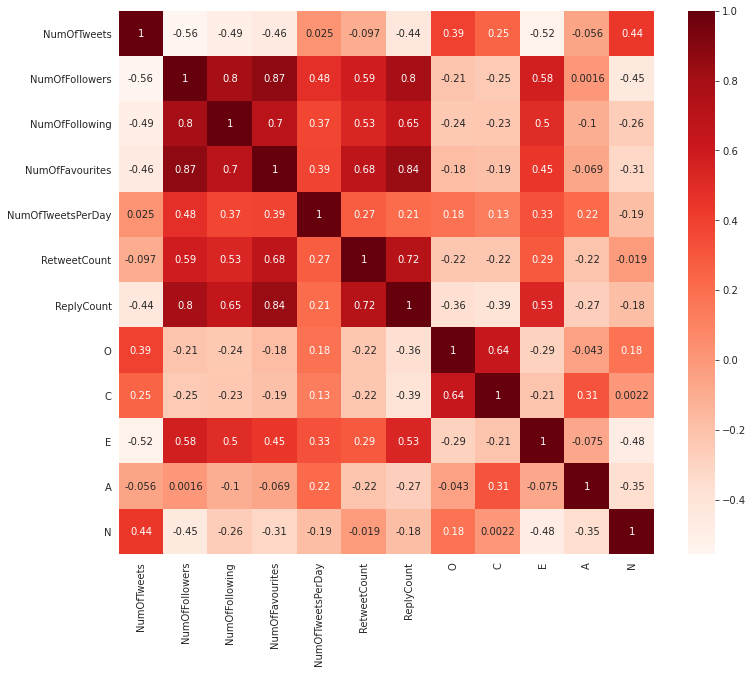

In [38]:
import seaborn as sns
plt.figure(figsize=(12,10))
corX = dfM.corr(method="spearman")
sns.heatmap(corX, annot=True, cmap=plt.cm.Reds)
plt.show()

In [39]:
#Correlation with output variable
#for multiclass 
cor_target_O = abs(corX['O'])
cor_target_C = abs(corX['C'])
cor_target_E = abs(corX['E'])
cor_target_A = abs(corX['A'])
cor_target_N = abs(corX['N'])
#Selecting highly correlated features
relevant_features_O = cor_target_O[cor_target_O>=0.05]
relevant_features_C = cor_target_C[cor_target_C>=0.05]
relevant_features_E = cor_target_E[cor_target_E>=0.05]
relevant_features_A = cor_target_A[cor_target_A>=0.05]
relevant_features_N = cor_target_N[cor_target_N>=0.05]


print("relevant features to O:\n",relevant_features_O)
print("\n relevant features to C:\n",relevant_features_C)
print("\n relevant features to E:\n",relevant_features_E)
print("\n relevant features to A:\n",relevant_features_A)
print("\n relevant features to N:\n",relevant_features_N)


relevant features to O:
 NumOfTweets          0.394747
NumOfFollowers       0.214771
NumOfFollowing       0.238328
NumOfFavourites      0.177181
NumOfTweetsPerDay    0.184032
RetweetCount         0.224564
ReplyCount           0.360229
O                    1.000000
C                    0.636495
E                    0.285989
N                    0.177269
Name: O, dtype: float64

 relevant features to C:
 NumOfTweets          0.247912
NumOfFollowers       0.246193
NumOfFollowing       0.231781
NumOfFavourites      0.189373
NumOfTweetsPerDay    0.126283
RetweetCount         0.224563
ReplyCount           0.392290
O                    0.636495
C                    1.000000
E                    0.214465
A                    0.314249
Name: C, dtype: float64

 relevant features to E:
 NumOfTweets          0.520762
NumOfFollowers       0.575698
NumOfFollowing       0.497516
NumOfFavourites      0.445767
NumOfTweetsPerDay    0.325138
RetweetCount         0.292736
ReplyCount           0.532612
O  

In [40]:
dfB = df_binary[['NumOfTweets', 'NumOfFollowers', 'NumOfFollowing',
      'NumOfFavourites', 'NumOfTweetsPerDay', 'RetweetCount', 'ReplyCount',
       'O','C','E','A','N']]
dfB.corr(method="spearman")

NumOfTweets  NumOfFollowers  ...         A         N
NumOfTweets           1.000000        0.408510  ...  0.075551  0.146980
NumOfFollowers        0.408510        1.000000  ...  0.087933 -0.018014
NumOfFollowing        0.206889        0.648134  ...  0.125503 -0.009416
NumOfFavourites       0.386317        0.716418  ...  0.093300  0.037256
NumOfTweetsPerDay     0.287676        0.628599  ...  0.074330 -0.005445
RetweetCount          0.691173        0.492840  ...  0.082577  0.203499
ReplyCount            0.671036        0.541736  ...  0.080111  0.094598
O                    -0.015569        0.047934  ...  0.038169 -0.153300
C                    -0.002461       -0.082856  ...  0.057321 -0.132165
E                     0.019722        0.176670  ... -0.011483  0.019929
A                     0.075551        0.087933  ...  1.000000 -0.068656
N                     0.146980       -0.018014  ... -0.068656  1.000000

[12 rows x 12 columns]

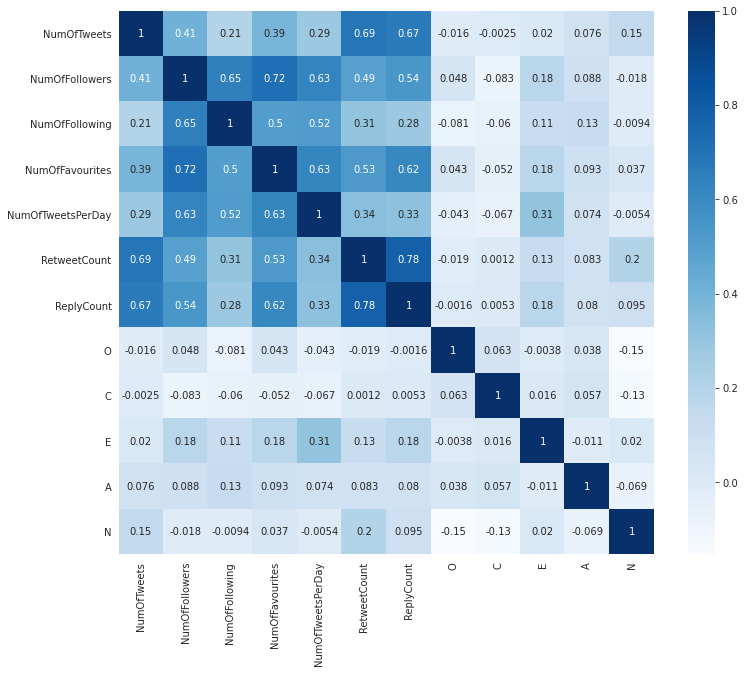

In [41]:
import seaborn as sns
plt.figure(figsize=(12,10))
corY = dfB.corr(method="spearman")
sns.heatmap(corY, annot=True, cmap=plt.cm.Blues)
plt.show()

In [42]:
#Correlation with output variable
cor_target_Ob = abs(corY['O'])
cor_target_Cb = abs(corY['C'])
cor_target_Eb = abs(corY['E'])
cor_target_Ab = abs(corY['A'])
cor_target_Nb = abs(corY['N'])
#Selecting highly correlated features
relevant_features_Ob = cor_target_Ob[cor_target_Ob>=0.05]
relevant_features_Cb = cor_target_Cb[cor_target_Cb>=0.05]
relevant_features_Eb = cor_target_Eb[cor_target_Eb>=0.05]
relevant_features_Ab = cor_target_Ab[cor_target_Ab>=0.05]
relevant_features_Nb = cor_target_Nb[cor_target_Nb>=0.05]


print("relevant features to O:\n",relevant_features_Ob)
print("\n relevant features to C:\n",relevant_features_Cb)
print("\n relevant features to E:\n",relevant_features_Eb)
print("\n relevant features to A:\n",relevant_features_Ab)
print("\n relevant features to N:\n",relevant_features_Nb)


relevant features to O:
 NumOfFollowing    0.080711
O                 1.000000
C                 0.062574
N                 0.153300
Name: O, dtype: float64

 relevant features to C:
 NumOfFollowers       0.082856
NumOfFollowing       0.060297
NumOfFavourites      0.052093
NumOfTweetsPerDay    0.066718
O                    0.062574
C                    1.000000
A                    0.057321
N                    0.132165
Name: C, dtype: float64

 relevant features to E:
 NumOfFollowers       0.176670
NumOfFollowing       0.114222
NumOfFavourites      0.181191
NumOfTweetsPerDay    0.313132
RetweetCount         0.125740
ReplyCount           0.180829
E                    1.000000
Name: E, dtype: float64

 relevant features to A:
 NumOfTweets          0.075551
NumOfFollowers       0.087933
NumOfFollowing       0.125503
NumOfFavourites      0.093300
NumOfTweetsPerDay    0.074330
RetweetCount         0.082577
ReplyCount           0.080111
C                    0.057321
A                    1.0

#model 1




In [67]:
df_m_c = df_multi.copy()

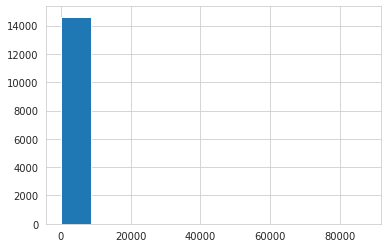

In [54]:
df_m_c['tweets_length'] = df_m_c.tweets.apply(len)

p = plt.hist(df_m_c.tweets_length.values)

In [55]:
df_m_c.head()

ID                                             tweets  ...  N  tweets_length
0   0  ياتي الحلال والحرام وقت فلتختار بتان تندم استر...  ...  4             76
1   0                            اله الله محمد رسول الله  ...  4             23
2   0                                  احضنها بروح خيالك  ...  4             17
3   0                                  احضنها خوفك سءالك  ...  4             17
4   0                             احضنها تلمحك عينيك وجع  ...  4             22

[5 rows x 20 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


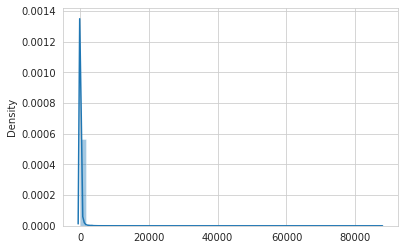

In [56]:
p = sns.distplot(df_m_c.tweets_length.values)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


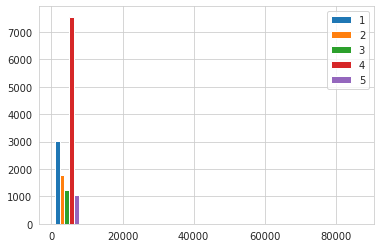

In [57]:
p = plt.hist([df_m_c[df_m_c.O==1].tweets_length.values, 
              df_m_c[df_m_c.O==2].tweets_length.values,
              df_m_c[df_m_c.O==3].tweets_length.values,
              df_m_c[df_m_c.O==4].tweets_length.values,
              df_m_c[df_m_c.O==5].tweets_length.values], label=['1', '2','3','4','5'])
plt.legend()

In [58]:
'''from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X, y)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
nb.predict(np.asarray(df[columns]))
array([0, 1, 0, ..., 1, 1, 1])
np.mean(nb.predict(np.asarray(df[columns])) == df.sentiment)'''

'from sklearn.naive_bayes import MultinomialNB\nnb = MultinomialNB()\nnb.fit(X, y)\nMultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)\nnb.predict(np.asarray(df[columns]))\narray([0, 1, 0, ..., 1, 1, 1])\nnp.mean(nb.predict(np.asarray(df[columns])) == df.sentiment)'

In [ ]:
'''from sklearn.preprocessing import MultiLabelBinarizer

te = df_multi["tweets"]
count_vec = CountVectorizer()
cv = count_vec.fit_transform(te)
mlb = MultiLabelBinarizer().fit([te])

pd.DataFrame(cv.toarray(), columns=[mlb.classes_])
'''

In [41]:
word_vectorizer = CountVectorizer(ngram_range=(1,3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df_m_c.tweets)
word_vectorizer.vocabulary_

{'ياتي': 628821,
 'الحلال': 77378,
 'والحرام': 586072,
 'وقت': 610987,
 'فلتختار': 428857,
 'بتان': 194569,
 'تندم': 267169,
 'استرخاء': 27367,
 'لله': 482942,
 'وانا': 592284,
 'راحعون': 327720,
 'جدد': 274566,
 'ايمانك': 179898,
 'ياتي الحلال': 628826,
 'الحلال والحرام': 77399,
 'والحرام وقت': 586073,
 'وقت فلتختار': 611263,
 'فلتختار بتان': 428858,
 'بتان تندم': 194570,
 'تندم استرخاء': 267170,
 'استرخاء لله': 27397,
 'لله وانا': 483564,
 'وانا راحعون': 592630,
 'راحعون جدد': 327721,
 'جدد ايمانك': 274567,
 'ياتي الحلال والحرام': 628827,
 'الحلال والحرام وقت': 77400,
 'والحرام وقت فلتختار': 586074,
 'وقت فلتختار بتان': 611264,
 'فلتختار بتان تندم': 428859,
 'بتان تندم استرخاء': 194571,
 'تندم استرخاء لله': 267171,
 'استرخاء لله وانا': 27398,
 'لله وانا راحعون': 483568,
 'وانا راحعون جدد': 592631,
 'راحعون جدد ايمانك': 327722,
 'اله': 146948,
 'الله': 117689,
 'محمد': 508635,
 'رسول': 334724,
 'اله الله': 146983,
 'الله محمد': 120432,
 'محمد رسول': 508812,
 'رسول الله': 334729,
 'اله

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pickle
from sklearn.svm import SVC,LinearSVC
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
import warnings


warnings.filterwarnings("ignore")
X = np.array(df_multi['tweets'])
X = word_vectorizer.fit_transform(X)


y = df_multi[['O', 'C', 'E', 'A', 'N']]

'''y_O = np.array(df_multi.O)
y_C = np.array(df_multi.C)
y_E = np.array(df_multi.E)
y_A = np.array(df_multi.A)
y_N = np.array(df_multi.N)



y = np.vstack((y_O, y_C, y_E, y_A, y_N)).T
'''

Encoder = OneHotEncoder()
#pd.get_dummies(y,drop_first = True)
#pd.get_dummies(X.shape[0])
#X = X.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =1/3, random_state=100)



#count_vect=CountVectorizer()
#X_train_counts=count_vect.fit_transform(X_train)
'''tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_train_tfidf.toarray()
'''


#from imblearn.over_sampling import RandomOverSampler
#sm=RandomOverSampler()

#X_train = X_train.reshape(-1,1)
y_train_O = y_train.iloc[:,[0]]
y_train_C = y_train.iloc[:,[1]]
y_train_E = y_train.iloc[:,[2]]
y_train_A = y_train.iloc[:,[3]]
y_train_N = y_train.iloc[:,[4]]


y_train_O = np.array(y_train_O)
y_train_C = np.array(y_train_C)
y_train_E = np.array(y_train_E)
y_train_A = np.array(y_train_A)
y_train_N = np.array(y_train_N)

#X_train = X_train.transpose()
'''
X_train_res, y_train_resO = sm.fit_sample(X_train, y_train_O)
X_train_res, y_train_resC = sm.fit_sample(X_train, y_train_C)
X_train_res, y_train_resE = sm.fit_sample(X_train, y_train_E)
X_train_res, y_train_resA = sm.fit_sample(X_train, y_train_A)
X_train_res, y_train_resN = sm.fit_sample(X_train, y_train_N)
'''
#X_train_res = Encoder.fit_transform(X_train_res)
#unique, counts = np.unique(y_train_res, return_counts=True)
#print(list(zip(unique, counts)))

#

y_test_O = y_test.iloc[:,[0]]
y_test_C = y_test.iloc[:,[1]]
y_test_E = y_test.iloc[:,[2]]
y_test_A = y_test.iloc[:,[3]]
y_test_N = y_test.iloc[:,[4]]


#X_test_tfidf=count_vect.transform(X_test)
#X_test = word_vectorizer.fit(X_test)



SVM:

In [47]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
#ngram_range=(1,3), analyzer='word'


word_vectorizer = CountVectorizer()
X_train_V = word_vectorizer.fit_transform(X_train)
X_test_V = word_vectorizer.fit_transform(X_test)
frequencies = sum(X_train_V).data
features = (word_vectorizer.get_feature_names()) 
#X_train_V = X_train_V.toarray()

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_V)
X_train_tfidf.shape

'''
forest = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(X_train_tfidf, y_train)

print("the result of MutliOutput-classification-using-RandomForest ")
print('The mean square error %10.9f ' % np.mean((multi_target_forest.predict(X_test_V)-y_test)**2))  # The mean square error
print('the mean accuracy on the given test data and labels %10.9f'% multi_target_forest.score(X_test, y_test))
'''

'\nforest = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=1)\nmulti_target_forest = MultiOutputClassifier(forest, n_jobs=-1)\nmulti_target_forest.fit(X_train_tfidf, y_train)\n\nprint("the result of MutliOutput-classification-using-RandomForest ")\nprint(\'The mean square error %10.9f \' % np.mean((multi_target_forest.predict(X_test_V)-y_test)**2))  # The mean square error\nprint(\'the mean accuracy on the given test data and labels %10.9f\'% multi_target_forest.score(X_test, y_test))\n'

In [57]:
#X_test_V = word_vectorizer.fit_transform(X_test)
#X_test_V = X_test_V.toarray()


df_m_c = df_multi.copy()
evaluation = []
data = len(df_m_c.tweets)
vec_name = "Countvectorizer"


from sklearn import svm
name = "svm"

print("training Extraversion cEXT using SVM...")
clf_svm_E = svm.SVC(kernel='linear')
clf_svm_E.fit(X_train, y_train_E)
evaluation.append([data, vec_name, name, "E", clf_svm_E.score(X_test, y_test_E)])
print("cExt score: ", clf_svm_E.score(X_test, y_test_E))


print("training Neuroticism cNEU using SVM...")
clf_svm_N = svm.SVC(kernel='linear')
clf_svm_N.fit(X_train, y_train_N)
evaluation.append([data, vec_name, name, "N", clf_svm_N.score(X_test, y_test_N)])
print("cNEU score: ", clf_svm_N.score(X_test, y_test_N))

    
print("training agreableness cAGR using using SVM...")
clf_svm_A = svm.SVC(kernel='linear')
clf_svm_A.fit(X_train, y_train_A)
evaluation.append([data, vec_name, name, "A", clf_svm_A.score(X_test, y_test_A)])

print("cAGR score: ", clf_svm_A.score(X_test, y_test_A))

print("training Conscientiousness cCON using SVM...")
clf_svm_C = svm.SVC(kernel='linear')
clf_svm_C.fit(X_train, y_train_C)
evaluation.append([data, vec_name, name, "C", clf_svm_C.score(X_test, y_test_C)])
print("cCON score: ", clf_svm_C.score(X_test, y_test_C))

print("training Openness to Experience cOPN using SVM...")
clf_svm_O = svm.SVC(kernel='linear')
clf_svm_O.fit(X_train, y_train_O)
evaluation.append([data, vec_name, name, "O", clf_svm_O.score(X_test, y_test_O)])
print("cOPN score: ", clf_svm_O.score(X_test, y_test_O))

training Extraversion cEXT using SVM...
cExt score:  0.6357493857493858
training Neuroticism cNEU using SVM...
cNEU score:  0.6427108927108927
training agreableness cAGR using using SVM...
cAGR score:  0.6678951678951679
training Conscientiousness cCON using SVM...
cCON score:  0.644963144963145
training Openness to Experience cOPN using SVM...
cOPN score:  0.6261261261261262


Decision Tree:

In [64]:
from sklearn import tree
name = "tree"

print("training Extraversion cEXT using decision tree")
clf_dec_E = tree.DecisionTreeClassifier()
clf_dec_E.fit(X_train, y_train_E)
evaluation.append([data, vec_name, name, "E", clf_dec_E.score(X_test, y_test_E)])
print("cEXT score: ", clf_dec_E.score(X_test, y_test_E))


print("training Neuroticism cNEU using decision tree")
clf_dec_N = tree.DecisionTreeClassifier()
clf_dec_N.fit(X_train, y_train_N)
evaluation.append([data, vec_name, name, "N", clf_dec_N.score(X_test, y_test_N)])
print("cNEU score: ", clf_dec_N.score(X_test, y_test_N))


print("training Agreeableness cAGR using using decision tree")
clf_dec_A = tree.DecisionTreeClassifier()
clf_dec_A.fit(X_train, y_train_A)
evaluation.append([data, vec_name, name, "A", clf_dec_A.score(X_test, y_test_A)])
print("cAGR score: ", clf_dec_A.score(X_test, y_test_A))

print("training Conscientiousness cCON using decision tree")
clf_dec_C = tree.DecisionTreeClassifier()
clf_dec_C.fit(X_train, y_train_C)
evaluation.append([data, vec_name, name, "C", clf_dec_C.score(X_test, y_test_C)])
print("cCON score: ", clf_dec_C.score(X_test, y_test_C))

print("training Openness to Experience cOPN using decision tree")
clf_dec_O = tree.DecisionTreeClassifier()
clf_dec_O.fit(X_train, y_train_O)
evaluation.append([data, vec_name, name, "O", clf_dec_O.score(X_test, y_test_O)])
print("cOPN score: ", clf_dec_O.score(X_test, y_test_O))

training Extraversion cEXT using decision tree
cEXT score:  0.5892710892710893
training Neuroticism cNEU using decision tree
cNEU score:  0.5806715806715806
training Agreeableness cAGR using using decision tree
cAGR score:  0.6097461097461098
training Conscientiousness cCON using decision tree
cCON score:  0.5874283374283374
training Openness to Experience cOPN using decision tree
cOPN score:  0.5909090909090909


MNB:


In [62]:
from sklearn.naive_bayes import MultinomialNB
#mnb = MultinomialNB()

name = "MNB"

print("training Extraversion cEXT using Multinomial Naive Bayes Classifier ...")
clf_gnb_E = MultinomialNB()
clf_gnb_E.fit(X_train.toarray(), y_train_E)
evaluation.append([data, vec_name, name, "E", clf_gnb_E.score(X_test.toarray(), y_test_E)])
print("cEXT score: ", clf_gnb_E.score(X_test.toarray(), y_test_E))


print("training Neuroticism cNEU using Multinomial Naive Bayes Classifier ...")
clf_gnb_N = MultinomialNB()
clf_gnb_N.fit(X_train.toarray(), y_train_N)
evaluation.append([data, vec_name, name, "N", clf_gnb_N.score(X_test.toarray(), y_test_N)])
print("cNEU score: ", clf_gnb_N.score(X_test.toarray(), y_test_N))
    
print("training Agreeableness cAGR using using Multinomial Naive Bayes Classifier ...")
clf_gnb_A = MultinomialNB()
clf_gnb_A.fit(X_train.toarray(), y_train_A)
evaluation.append([data, vec_name, name, "A", clf_gnb_A.score(X_test.toarray(), y_test_A)])
print("cAGR score: ", clf_gnb_A.score(X_test.toarray(), y_test_A))

print("training Conscientiousness cCON using Multinomial Naive Bayes Classifier ...")
clf_gnb_C = MultinomialNB()
clf_gnb_C.fit(X_train.toarray(), y_train_C)
evaluation.append([data, vec_name, name, "C", clf_gnb_C.score(X_test.toarray(), y_test_C)])
print("cCON score: ", clf_gnb_C.score(X_test.toarray(), y_test_C))

print("training Openness to Experience cOPN using Multinomial Naive Bayes Classifier ...")
clf_gnb_O = MultinomialNB()
clf_gnb_O.fit(X_train.toarray(), y_train_O)
evaluation.append([data, vec_name, name, "O", clf_gnb_O.score(X_test.toarray(), y_test_O)])
print("cOPN score: ", clf_gnb_O.score(X_test.toarray(), y_test_O))

training Extraversion cEXT using Multinomial Naive Bayes Classifier ...
cEXT score:  0.6246928746928747
training Neuroticism cNEU using Multinomial Naive Bayes Classifier ...
cNEU score:  0.6328828828828829
training Agreeableness cAGR using using Multinomial Naive Bayes Classifier ...
cAGR score:  0.6631859131859131
training Conscientiousness cCON using Multinomial Naive Bayes Classifier ...
cCON score:  0.6277641277641277
training Openness to Experience cOPN using Multinomial Naive Bayes Classifier ...
cOPN score:  0.5978705978705978


Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
name="logR"

print("training Extraversion cEXT using Logistic Regression")
clf_log_E = LogisticRegression(solver="newton-cg")
clf_log_E.fit(X_train, y_train_E)
evaluation.append([data, vec_name, name, "E", clf_log_E.score(X_test, y_test_E)])
print("cEXT score: ", clf_log_E.score(X_test, y_test_E))


print("training Neuroticism cNEU using  Logistic Regression")
clf_log_N = LogisticRegression(solver="newton-cg")
clf_log_N.fit(X_train, y_train_N)
evaluation.append([data, vec_name, name, "N", clf_log_N.score(X_test, y_test_N)])
print("cNEU score: ", clf_log_N.score(X_test, y_test_N))


print("training Agreeableness cAGR using using Logistic Regression")
clf_log_A = LogisticRegression(solver="newton-cg")
clf_log_A.fit(X_train, y_train_A)
evaluation.append([data, vec_name, name, "A", clf_log_A.score(X_test, y_test_A)])
print("cAGR score: ", clf_log_A.score(X_test, y_test_A))

print("training Conscientiousness cCON using Logistic Regression")
clf_log_C = LogisticRegression(solver="newton-cg")
clf_log_C.fit(X_train, y_train_C)
evaluation.append([data, vec_name, name, "C", clf_log_C.score(X_test, y_test_C)])
print("cCON score: ", clf_log_C.score(X_test, y_test_C))

print("training Openness to Experience cOPN using Logistic Regression")
clf_log_O = LogisticRegression(solver="newton-cg")
clf_log_O.fit(X_train, y_train_O)
evaluation.append([data, vec_name, name, "O", clf_log_O.score(X_test, y_test_O)])
print("cOPN score: ", clf_log_O.score(X_test, y_test_O))

training Extraversion cEXT using Logistic Regression
cEXT score:  0.6476248976248976
training Neuroticism cNEU using  Logistic Regression
cNEU score:  0.666052416052416
training Agreeableness cAGR using using Logistic Regression
cAGR score:  0.6807944307944308
training Conscientiousness cCON using Logistic Regression
cCON score:  0.661957411957412
training Openness to Experience cOPN using Logistic Regression
cOPN score:  0.6418918918918919


Random Forest

In [66]:
  from sklearn.ensemble import RandomForestClassifier
name="RF"


print("training Extraversion cEXT using Random Forest")
clf_rf_E = RandomForestClassifier(n_estimators=100)
clf_rf_E.fit(X_train, y_train_E)
evaluation.append([data, vec_name, name, "E", clf_rf_E.score(X_test, y_test_E)])
print("cEXT score: ", clf_rf_E.score(X_test, y_test_E))


print("training Neuroticism cNEU using  Random Forest")
clf_rf_N = RandomForestClassifier(n_estimators=100)
clf_rf_N.fit(X_train, y_train_N)
evaluation.append([data, vec_name, name, "N", clf_rf_N.score(X_test, y_test_N)])
print("cNEU score: ", clf_rf_N.score(X_test, y_test_N))


print("training Agreeableness cAGR using using Random Forest")
clf_rf_A = RandomForestClassifier(n_estimators=100)
clf_rf_A.fit(X_train, y_train_A)
evaluation.append([data, vec_name, name, "A", clf_rf_A.score(X_test, y_test_A)])
print("cAGR score: ", clf_rf_A.score(X_test, y_test_A))

print("training Conscientiousness cCON using Random Forest")
clf_rf_C = RandomForestClassifier(n_estimators=100)
clf_rf_C.fit(X_train, y_train_C)
evaluation.append([data, vec_name, name, "C", clf_rf_C.score(X_test, y_test_C)])
print("cCON score: ", clf_rf_C.score(X_test, y_test_C))

print("training Openness to Experience cOPN using Random Forest")
clf_rf_O = RandomForestClassifier(n_estimators=100)
clf_rf_O.fit(X_train, y_train_O)
evaluation.append([data, vec_name, name, "O", clf_rf_O.score(X_test, y_test_O)])
print("cOPN score: ", clf_rf_O.score(X_test, y_test_O))


training Extraversion cEXT using Random Forest
cEXT score:  0.6322686322686323
training Neuroticism cNEU using  Random Forest
cNEU score:  0.6193693693693694
training Agreeableness cAGR using using Random Forest
cAGR score:  0.6468058968058968
training Conscientiousness cCON using Random Forest
cCON score:  0.6371826371826372
training Openness to Experience cOPN using Random Forest
cOPN score:  0.6304258804258804


#Model 2 (label)

In [60]:
df_label = df.copy()

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pickle
from sklearn.svm import SVC,LinearSVC
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
import warnings


warnings.filterwarnings("ignore")


X = np.array(df_label['tweets'])
y = np.array(df_label['label'])
#Encoder = OneHotEncoder()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =1/3, random_state=100)

word_vectorizer = CountVectorizer()
X_train_l = word_vectorizer.fit_transform(X_train)
X_test_l = word_vectorizer.fit_transform(X_test)

#frequencies = sum(X_train_l).data
#features = (word_vectorizer.get_feature_names()) 
#X = X.values.reshape(-1,1)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_l)
X_test_tfidf = tfidf_transformer.fit_transform(X_test_l)


SVM

In [52]:
#SVM
pipe = make_pipeline(CountVectorizer(),
                     TfidfTransformer(),
                     SVC())
param_grid = {'svc__kernel': ['rbf', 'linear', 'poly'],
             'svc__gamma': [0.1, 1, 10, 100],
             'svc__C': [0.1, 1, 10, 100]}

svc_model = GridSearchCV(pipe, param_grid, cv=5, verbose=10)
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)
print(f"Accuracy score is {accuracy_score(y_test, prediction):.2f}")
print(classification_report(y_test, prediction))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf, score=0.531, total=  13.9s
[CV] svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.9s remaining:    0.0s


[CV]  svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf, score=0.535, total=  14.0s
[CV] svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf .....................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   27.9s remaining:    0.0s


[CV]  svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf, score=0.529, total=  14.1s
[CV] svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf .....................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   42.0s remaining:    0.0s


[CV]  svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf, score=0.531, total=  14.0s
[CV] svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf .....................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   56.0s remaining:    0.0s


[CV]  svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf, score=0.531, total=  13.9s
[CV] svc__C=0.1, svc__gamma=0.1, svc__kernel=linear ..................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min remaining:    0.0s


[CV]  svc__C=0.1, svc__gamma=0.1, svc__kernel=linear, score=0.571, total=  11.5s
[CV] svc__C=0.1, svc__gamma=0.1, svc__kernel=linear ..................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.4min remaining:    0.0s


[CV]  svc__C=0.1, svc__gamma=0.1, svc__kernel=linear, score=0.566, total=  11.5s
[CV] svc__C=0.1, svc__gamma=0.1, svc__kernel=linear ..................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.5min remaining:    0.0s


[CV]  svc__C=0.1, svc__gamma=0.1, svc__kernel=linear, score=0.564, total=  11.4s
[CV] svc__C=0.1, svc__gamma=0.1, svc__kernel=linear ..................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.7min remaining:    0.0s


[CV]  svc__C=0.1, svc__gamma=0.1, svc__kernel=linear, score=0.564, total=  11.4s
[CV] svc__C=0.1, svc__gamma=0.1, svc__kernel=linear ..................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.9min remaining:    0.0s


[CV]  svc__C=0.1, svc__gamma=0.1, svc__kernel=linear, score=0.559, total=  11.5s
[CV] svc__C=0.1, svc__gamma=0.1, svc__kernel=poly ....................
[CV]  svc__C=0.1, svc__gamma=0.1, svc__kernel=poly, score=0.499, total=   9.3s
[CV] svc__C=0.1, svc__gamma=0.1, svc__kernel=poly ....................
[CV]  svc__C=0.1, svc__gamma=0.1, svc__kernel=poly, score=0.498, total=   9.3s
[CV] svc__C=0.1, svc__gamma=0.1, svc__kernel=poly ....................
[CV]  svc__C=0.1, svc__gamma=0.1, svc__kernel=poly, score=0.498, total=   9.3s
[CV] svc__C=0.1, svc__gamma=0.1, svc__kernel=poly ....................
[CV]  svc__C=0.1, svc__gamma=0.1, svc__kernel=poly, score=0.499, total=   9.4s
[CV] svc__C=0.1, svc__gamma=0.1, svc__kernel=poly ....................
[CV]  svc__C=0.1, svc__gamma=0.1, svc__kernel=poly, score=0.499, total=   9.4s
[CV] svc__C=0.1, svc__gamma=1, svc__kernel=rbf .......................
[CV]  svc__C=0.1, svc__gamma=1, svc__kernel=rbf, score=0.546, total=  15.3s
[CV] svc__C=0.1, svc__

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 61.4min finished


Accuracy score is 0.68
              precision    recall  f1-score   support

           0       0.71      0.90      0.80      2471
           1       0.62      0.37      0.47       550
           2       0.64      0.58      0.61       822
           3       0.80      0.39      0.52       310
           4       0.54      0.37      0.44       731

    accuracy                           0.68      4884
   macro avg       0.66      0.52      0.57      4884
weighted avg       0.67      0.68      0.66      4884



Logistic Regression

In [65]:
pipe = make_pipeline(CountVectorizer(),
                     TfidfTransformer(),
                     LogisticRegression())
# make param grid
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

# create and fit the model
model = GridSearchCV(pipe, param_grid, cv=5, verbose=10)
model.fit(X_train,y_train)

# make prediction and print accuracy
prediction = model.predict(X_test)
print(f"Accuracy score is {accuracy_score(y_test, prediction):.2f}")
print(classification_report(y_test, prediction))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] logisticregression__C=0.01 ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... logisticregression__C=0.01, score=0.518, total=   1.6s
[CV] logisticregression__C=0.01 ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] .......... logisticregression__C=0.01, score=0.516, total=   1.6s
[CV] logisticregression__C=0.01 ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


[CV] .......... logisticregression__C=0.01, score=0.516, total=   1.3s
[CV] logisticregression__C=0.01 ......................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.6s remaining:    0.0s


[CV] .......... logisticregression__C=0.01, score=0.519, total=   1.6s
[CV] logisticregression__C=0.01 ......................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.2s remaining:    0.0s


[CV] .......... logisticregression__C=0.01, score=0.519, total=   1.5s
[CV] logisticregression__C=0.1 .......................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.7s remaining:    0.0s


[CV] ........... logisticregression__C=0.1, score=0.575, total=   2.8s
[CV] logisticregression__C=0.1 .......................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   10.5s remaining:    0.0s


[CV] ........... logisticregression__C=0.1, score=0.570, total=   3.2s
[CV] logisticregression__C=0.1 .......................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   13.7s remaining:    0.0s


[CV] ........... logisticregression__C=0.1, score=0.567, total=   3.1s
[CV] logisticregression__C=0.1 .......................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   16.8s remaining:    0.0s


[CV] ........... logisticregression__C=0.1, score=0.563, total=   2.8s
[CV] logisticregression__C=0.1 .......................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   19.6s remaining:    0.0s


[CV] ........... logisticregression__C=0.1, score=0.563, total=   3.2s
[CV] logisticregression__C=1 .........................................
[CV] ............. logisticregression__C=1, score=0.640, total=   6.3s
[CV] logisticregression__C=1 .........................................
[CV] ............. logisticregression__C=1, score=0.641, total=   6.1s
[CV] logisticregression__C=1 .........................................
[CV] ............. logisticregression__C=1, score=0.634, total=   5.6s
[CV] logisticregression__C=1 .........................................
[CV] ............. logisticregression__C=1, score=0.633, total=   6.1s
[CV] logisticregression__C=1 .........................................
[CV] ............. logisticregression__C=1, score=0.633, total=   6.0s
[CV] logisticregression__C=10 ........................................
[CV] ............ logisticregression__C=10, score=0.670, total=   5.8s
[CV] logisticregression__C=10 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.9min finished


Accuracy score is 0.67
              precision    recall  f1-score   support

           0       0.71      0.89      0.79      2471
           1       0.56      0.40      0.47       550
           2       0.66      0.55      0.60       822
           3       0.62      0.41      0.49       310
           4       0.55      0.37      0.44       731

    accuracy                           0.67      4884
   macro avg       0.62      0.52      0.56      4884
weighted avg       0.65      0.67      0.65      4884



In [53]:
#Logistic Regression
# make pipeline
pipe = make_pipeline(CountVectorizer(),
                     TfidfTransformer(),
                     LogisticRegression())
# make param grid
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

# create and fit the model
model = GridSearchCV(pipe, param_grid, cv=5, verbose=10)
model.fit(X_train,y_train)

# make prediction and print accuracy
prediction = model.predict(X_test)
print(f"Accuracy score is {accuracy_score(y_test, prediction):.2f}")
print(classification_report(y_test, prediction))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] logisticregression__C=0.01 ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... logisticregression__C=0.01, score=0.518, total=   1.3s
[CV] logisticregression__C=0.01 ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] .......... logisticregression__C=0.01, score=0.516, total=   1.4s
[CV] logisticregression__C=0.01 ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


[CV] .......... logisticregression__C=0.01, score=0.516, total=   1.3s
[CV] logisticregression__C=0.01 ......................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.1s remaining:    0.0s


[CV] .......... logisticregression__C=0.01, score=0.519, total=   1.5s
[CV] logisticregression__C=0.01 ......................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.6s remaining:    0.0s


[CV] .......... logisticregression__C=0.01, score=0.519, total=   1.4s
[CV] logisticregression__C=0.1 .......................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.0s remaining:    0.0s


[CV] ........... logisticregression__C=0.1, score=0.575, total=   2.9s
[CV] logisticregression__C=0.1 .......................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.8s remaining:    0.0s


[CV] ........... logisticregression__C=0.1, score=0.570, total=   3.1s
[CV] logisticregression__C=0.1 .......................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   13.0s remaining:    0.0s


[CV] ........... logisticregression__C=0.1, score=0.567, total=   2.8s
[CV] logisticregression__C=0.1 .......................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   15.8s remaining:    0.0s


[CV] ........... logisticregression__C=0.1, score=0.563, total=   3.0s
[CV] logisticregression__C=0.1 .......................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   18.8s remaining:    0.0s


[CV] ........... logisticregression__C=0.1, score=0.563, total=   2.8s
[CV] logisticregression__C=1 .........................................
[CV] ............. logisticregression__C=1, score=0.640, total=   5.6s
[CV] logisticregression__C=1 .........................................
[CV] ............. logisticregression__C=1, score=0.641, total=   6.1s
[CV] logisticregression__C=1 .........................................
[CV] ............. logisticregression__C=1, score=0.634, total=   5.8s
[CV] logisticregression__C=1 .........................................
[CV] ............. logisticregression__C=1, score=0.633, total=   5.9s
[CV] logisticregression__C=1 .........................................
[CV] ............. logisticregression__C=1, score=0.633, total=   5.5s
[CV] logisticregression__C=10 ........................................
[CV] ............ logisticregression__C=10, score=0.670, total=   5.6s
[CV] logisticregression__C=10 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.8min finished


Accuracy score is 0.67
              precision    recall  f1-score   support

           0       0.71      0.89      0.79      2471
           1       0.56      0.40      0.47       550
           2       0.66      0.55      0.60       822
           3       0.62      0.41      0.49       310
           4       0.55      0.37      0.44       731

    accuracy                           0.67      4884
   macro avg       0.62      0.52      0.56      4884
weighted avg       0.65      0.67      0.65      4884



MNB

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(CountVectorizer(),
                     TfidfTransformer(),
                     MultinomialNB())
pipe.fit(X_train,y_train)
prediction = pipe.predict(X_test)
print(f"Accuracy score is {accuracy_score(y_test, prediction):.2f}")
print(classification_report(y_test, prediction))

Accuracy score is 0.59
              precision    recall  f1-score   support

           0       0.56      0.99      0.72      2471
           1       1.00      0.08      0.15       550
           2       0.80      0.40      0.53       822
           3       1.00      0.02      0.04       310
           4       1.00      0.03      0.06       731

    accuracy                           0.59      4884
   macro avg       0.87      0.30      0.30      4884
weighted avg       0.74      0.59      0.48      4884



In [73]:
pipe.predict([clean_text(' 😍 الدنيا زحمة فشخ أنا حاسس انى فاشل و مفيش اى تقدم بيحصل فى حياتى للاحسن')])

عيون القلب الدنيا زحمه فشخ حاسس اني فاشل مفيش اي تقدم بيحصل حياتي للاحسن


array([0])